In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv("Train_v2.csv")
data_test = pd.read_csv("Test_v2.csv")

In [3]:
data_train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
data_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [5]:
for i in data_train.columns:
    if i not in data_test.columns:
        print(i)

bank_account


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
country                   10086 non-null object
year                      10086 non-null int64
uniqueid                  10086 non-null object
location_type             10086 non-null object
cellphone_access          10086 non-null object
household_size            10086 non-null int64
age_of_respondent         10086 non-null int64
gender_of_respondent      10086 non-null object
relationship_with_head    10086 non-null object
marital_status            10086 non-null object
education_level           10086 non-null object
job_type                  10086 non-null object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


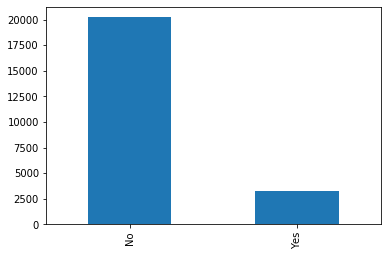

In [8]:
#checking how our target column data is distributed
#we get most of the data the answer is 'NO'
data_train.bank_account.value_counts().plot(kind='bar')

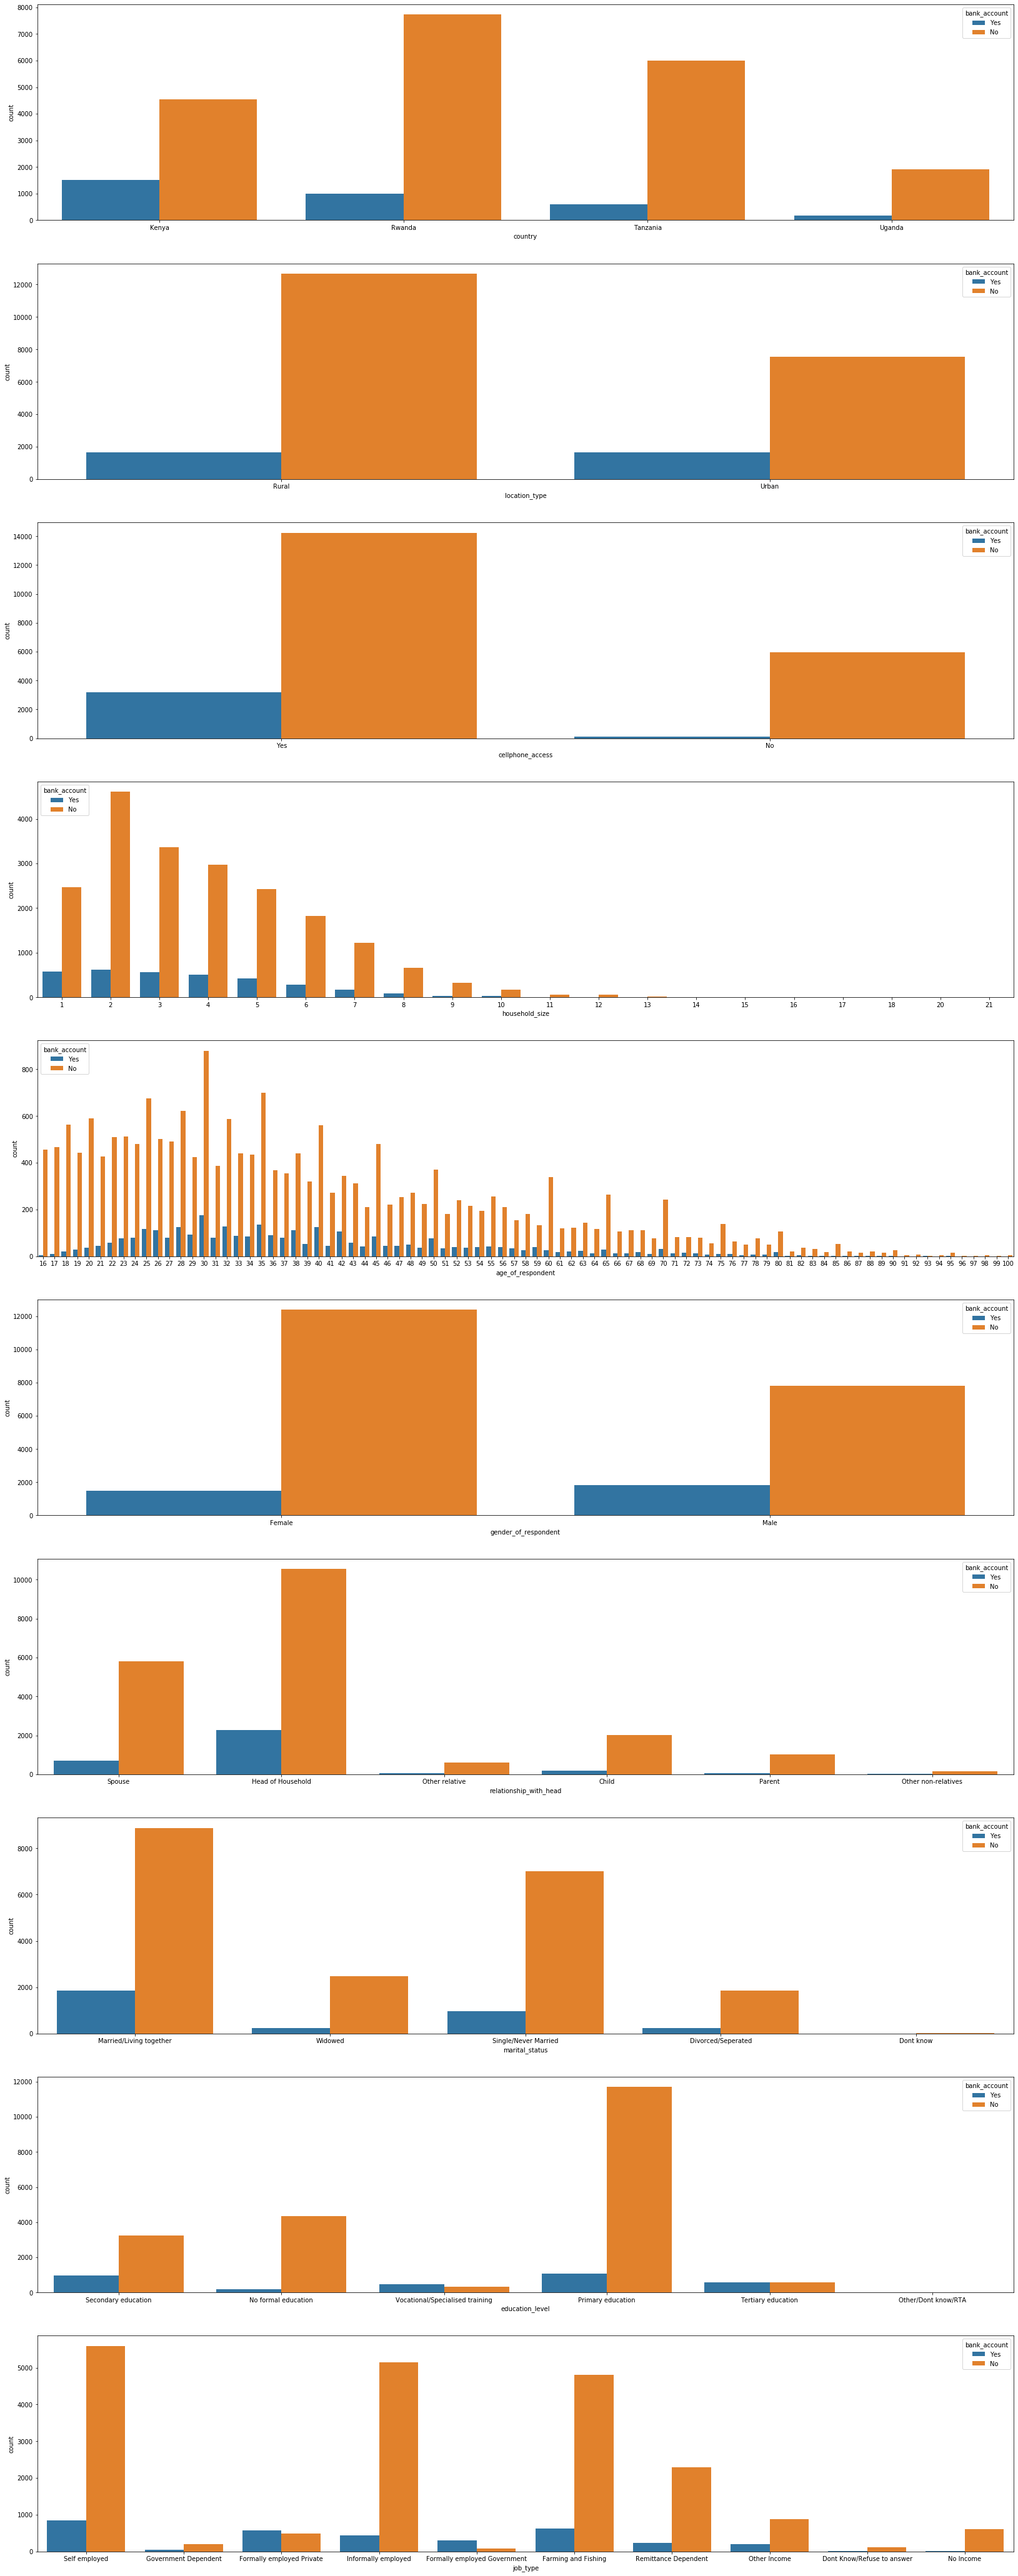

In [9]:
#checking the target distribution with various input features
f,axes=plt.subplots(10,1,figsize=[28,75])
sns.countplot('country',hue='bank_account',data=data_train,ax=axes[0])
sns.countplot('location_type',hue='bank_account',data=data_train,ax=axes[1])
sns.countplot('cellphone_access',hue='bank_account',data=data_train,ax=axes[2])
sns.countplot('household_size',hue='bank_account',data=data_train,ax=axes[3])
sns.countplot('age_of_respondent',hue='bank_account',data=data_train,ax=axes[4])
sns.countplot('gender_of_respondent',hue='bank_account',data=data_train,ax=axes[5])
sns.countplot('relationship_with_head',hue='bank_account',data=data_train,ax=axes[6])
sns.countplot('marital_status',hue='bank_account',data=data_train,ax=axes[7])
sns.countplot('education_level',hue='bank_account',data=data_train,ax=axes[8])
sns.countplot('job_type',hue='bank_account',data=data_train,ax=axes[9])

In [10]:
#converting categorical features to numerical features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
for column in data_train.columns.drop(['country','uniqueid']):
    data_train[column]=le.fit_transform(data_train[column])

In [11]:
data_train.sort_index(axis=1,inplace=True)
data_train.head()
#data_train.info()

,age_of_respondent,bank_account,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,uniqueid,year
0,8,1,1,Kenya,3,0,2,9,0,2,5,uniqueid_1,2
1,54,0,0,Kenya,0,0,4,4,0,4,1,uniqueid_2,2
2,10,1,1,Kenya,5,1,4,9,1,3,3,uniqueid_3,2
3,18,0,1,Kenya,2,0,4,3,0,2,1,uniqueid_4,2
4,10,0,0,Kenya,2,1,7,5,1,3,0,uniqueid_5,2


In [12]:
for column in data_test.columns.drop(['country','uniqueid']):
    data_test[column]=le.fit_transform(data_test[column])

In [13]:
data_test.sort_index(axis=1,inplace=True)
data_test.head()

,age_of_respondent,cellphone_access,country,education_level,gender_of_respondent,household_size,job_type,location_type,marital_status,relationship_with_head,uniqueid,year
0,14,1,Kenya,3,1,2,2,1,2,1,uniqueid_6056,2
1,35,1,Kenya,5,1,6,3,1,2,1,uniqueid_6060,2
2,61,0,Kenya,0,0,2,8,0,2,4,uniqueid_6065,2
3,23,0,Kenya,2,0,5,8,0,2,1,uniqueid_6072,2
4,0,0,Kenya,3,1,2,8,1,3,0,uniqueid_6073,2


In [14]:
for i in data_train.columns:
    if i not in data_test.columns:
        print(i)

bank_account


In [15]:
for i in data_test.columns:
    if i not in data_train.columns:
        print(i)

In [17]:
#selecting our features and target data
X_train=data_train.drop(['bank_account','uniqueid','country'],axis=1)
Y_train=data_train['bank_account']

X_test=data_test.drop(['uniqueid','country'],axis=1)

#rescale X_train and X_test
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.fit_transform(X_test)

In [18]:
for i in X_train.columns:
    if i not in X_test.columns:
        print(i)

In [19]:
X_train_rescaled.shape

(23524, 10)

In [20]:
#splitting our training data to test and train
from sklearn.model_selection import train_test_split
X_Train,X_val,Y_Train,Y_val = train_test_split(X_train_rescaled,Y_train,stratify=Y_train,test_size=0.2,random_state=42)

In [21]:
#predicting using xgboost
from xgboost import XGBClassifier
"""
model = XGBClassifier()

from sklearn.model_selection import GridSearchCV

# Optimize model paramaters
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model1 = GridSearchCV(model, param_grid)
model1.fit(X_train, Y_train)"""


"\nmodel = XGBClassifier()\n\nfrom sklearn.model_selection import GridSearchCV\n\n# Optimize model paramaters\nparam_grid = {'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5]\n        }\nmodel1 = GridSearchCV(model, param_grid)\nmodel1.fit(X_train, Y_train)"

#print(model1.best_params_)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
# fit and Evaluate model
model3 = XGBClassifier(min_child_weight = 10, gamma = 2, subsample = 0.6, colsample_bytree = 1.0, max_depth = 5)
model3.fit(X_Train, Y_Train)
Y_pred = model3.predict(X_val)

# Get error rate
print("Error rate of XGBOOST classifier: ", 1 - accuracy_score(Y_val, Y_pred))

# Get confusion matrix
confusion_matrix(Y_pred, Y_val)

# Get the predicted result for the test Data
data_test.bank_account = model3.predict(X_test_rescaled)

# create submission DataFrame
submission_df1 = pd.DataFrame({"uniqueid": data_test["uniqueid"] + " x " + data_test["country"],

"bank_account": data_test.bank_account})

Error rate of XGBOOST classifier:  0.11052072263549417


/home/gtechzilla/anaconda3/envs/ml_tensorflow/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/gtechzilla/anaconda3/envs/ml_tensorflow/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/gtechzilla/anaconda3/envs/ml_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [23]:
# Create submission csv file
submission_df1.to_csv('SubFile.csv', index = False)